# Lab 6.02 - Regression analysis

In [214]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression


## Exercise 2: Flemish agricultural and horticultural businesses

1. Use the dataset agriculture flanders.csv. The file contains data about agricultural and horticultural businesses in Flanders

    Source: Departement Landbouw en Visserij op basis van StatBel

In [215]:
farms = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/agriculture%20flanders.csv', delimiter = ";", decimal=',')
# Show the first few records of the Data Frame
farms.head()

,year,number_of_farms,average_area_per_farm_(ha)
0,1980,75706,8.38
1,1981,73292,8.58
2,1982,71255,8.79
3,1983,69807,8.94
4,1984,68083,9.15


2. What are the datatypes for each of the columns.

In [216]:
farms.dtypes

year                            int64
number_of_farms                 int64
average_area_per_farm_(ha)    float64
dtype: object

3. Draw a scatter plot of the number of farms versus the year.


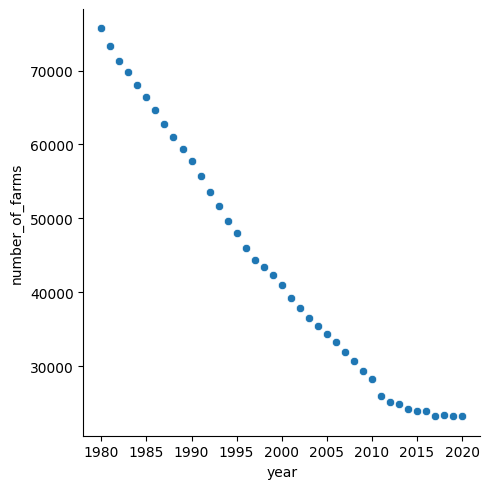

In [217]:
sns.relplot(data=farms,x='year', y='number_of_farms');

4. Is there a positive / negative relationship between year and number_of_farms?

    $R = -0.9861066349492859$

In [218]:
cor = np.corrcoef(farms.year, farms['number_of_farms'])[0][1]
print(f"R = { cor }")


R = -0.9861066349492861


6. Is there a strong relationship between year and 'number_of_farms'?

    $R^2 = 0.9724062954910041$

In [219]:
cor = np.corrcoef(farms.year, farms['number_of_farms'])[0][1]
print(f"R² = {cor ** 2}")

R² = 0.9724062954910045


7. Draw a scatter plot of the 'average_area_per_farm_(ha)' versus the year.

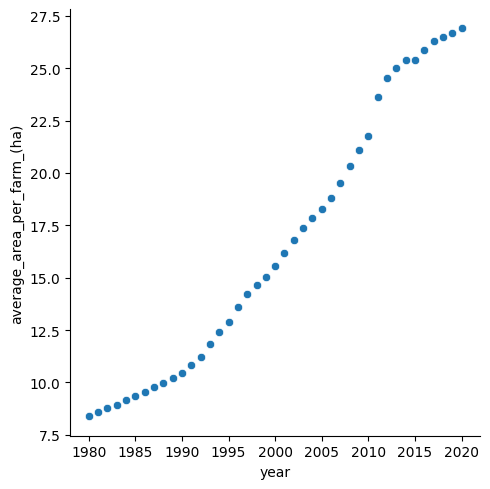

In [220]:
sns.relplot(data=farms,x='year', y='average_area_per_farm_(ha)');

8. What will be the 'average_area_per_farm_(ha)' in 2035?

Average area in 2035 = 34.91987804878045

In [ ]:
# x= farms['year']
# y = farms['average_area_per_farm_(ha)']
# a,b = np.polyfit(x,y,1)
# print(f"y = {a}x + {b}")
# print(f'gemiddeld oppervlakte in 2035 = {a*2035+b}')


x = farms.year.values.reshape(-1,1)
y = farms['average_area_per_farm_(ha)']

model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")

# Predict y values corresponding to x
print(f'gemiddelde oppervlakte in 2035', model.predict([[2035]])[0])



Regression line: ŷ = -1031.90 + 0.52 x
gemiddelde oppervlakte in 2035 34.91987804878045


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

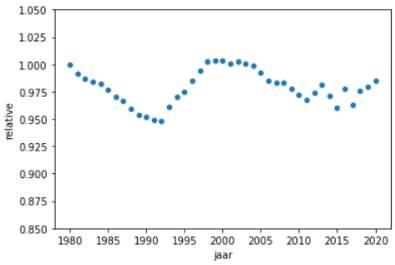


634416.28


(0.85, 1.05)

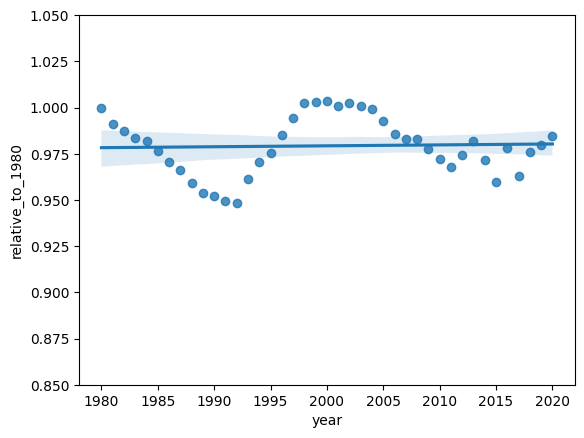

In [222]:
farms['total_area'] = farms['number_of_farms']*farms['average_area_per_farm_(ha)']

area_1980 = farms.iloc[0,3]
print(area_1980)
farms['relative_to_1980']=farms['total_area']/area_1980

sns.regplot(data= farms, x='year', y='relative_to_1980')
plt.ylim(0.85, 1.05)